### Bibliotecas de código

In [1]:
import pandas as pd
pd.options.display.max_rows = 200
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from re import sub
%matplotlib inline

## Carregar os dados

* os dados foram extraidos da página da kissfm http://www.kissfm.com.br/as-500-mais-da-kiss-20162017/

In [2]:
with open("songs.txt", 'r') as f: # source http://www.kissfm.com.br/as-500-mais-da-kiss-20162017/
    l = f.read()
items = [li[4:].split(u' – ') for li in l.split(u'\n')]
df = pd.DataFrame(data=items, columns=["artist", "song"], index=range(1, len(items) + 1))
df

,artist,song
1,Led Zeppelin,Stairway to Heaven
2,Queen,Bohemian Rhapsody
3,Metallica,One
4,Black Sabbath,Paranoid
5,The Who,Baba o’ Riley
6,The Beatles,Help!
7,Iron Maiden,The Number of the Beast
8,Deep Purple,Smoke on the Water
9,The Beatles,Hey Jude
10,Led Zeppelin,Rock and Roll


## Contagem por banda

* Número de músicas no top 500 por banda

In [3]:
dfg = df.groupby("artist").count().sort_values(by="song", ascending=False).rename(columns={"song": "songs"})
print("total number of artists: %i" % dfg.shape[0])

total number of artists: 169


In [4]:
dfg

,songs
artist,
The Beatles,18
Queen,14
Led Zeppelin,14
Aerosmith,13
The Rolling Stones,13
Van Halen,12
Guns N’ Roses,11
Pink Floyd,10
The Cult,10


## Gráfico - contagem por banda

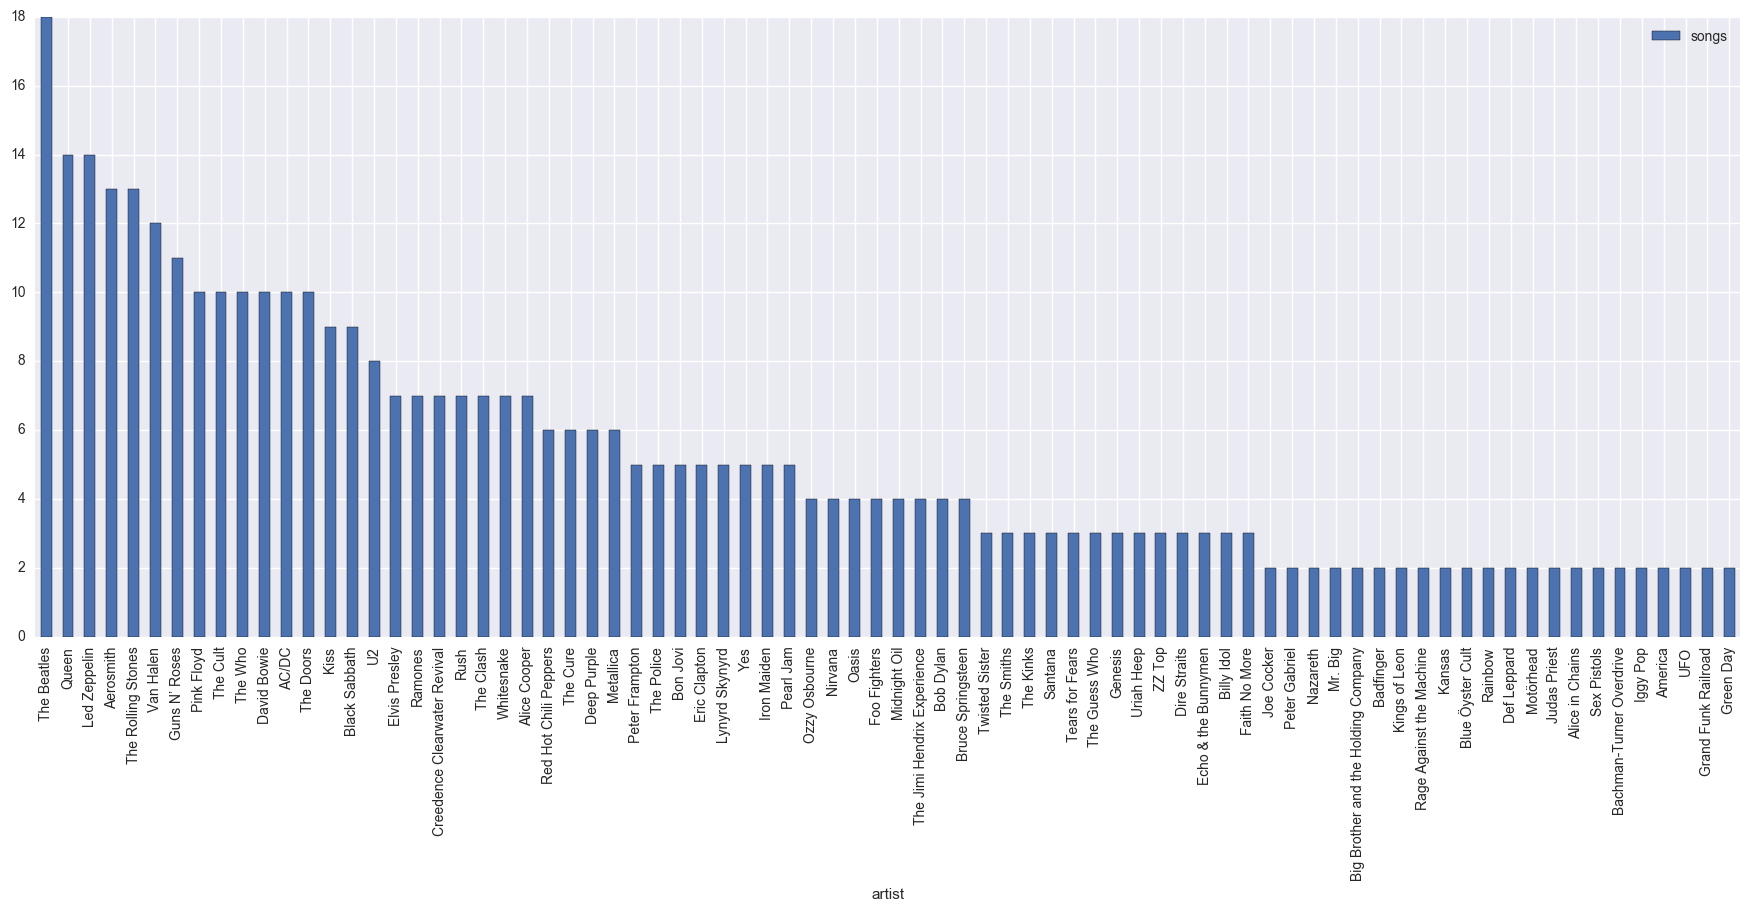

In [5]:
dfg[dfg.songs > 1].plot.bar(figsize=(22, 8))

# Nuvem de palavras

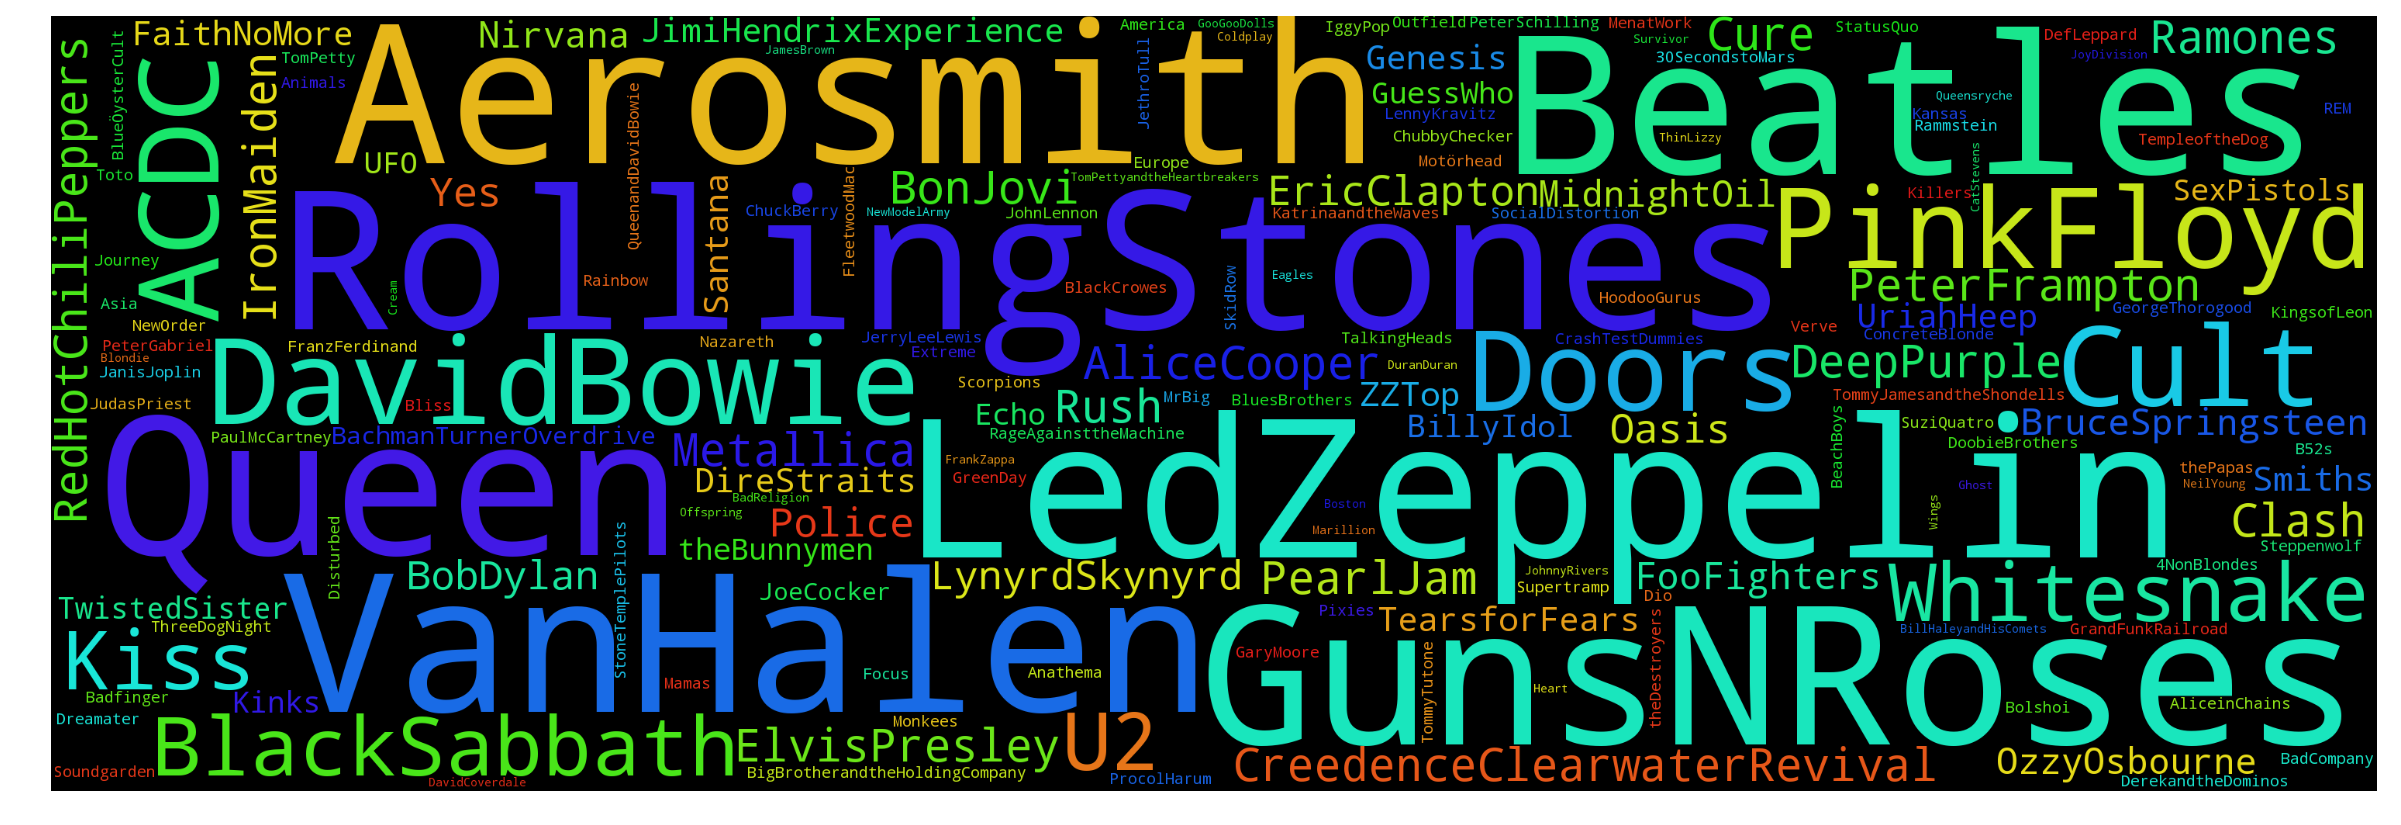

In [6]:
text = "\n".join([sub("[/\\`´\-_ \.'’]", '', "".join(a.split(" "))).replace("The", "") for a in df.artist.tolist()])
wordcloud = WordCloud(width=3000, height=1000, max_font_size=250).generate(text)
plt.figure(figsize=(30, 10), dpi=1200)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()